In [13]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from Pachaches.functions import clean_PM25frame_coloumns
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [24]:
chem=pd.read_excel(r"chem_polution.xlsx")

In [26]:
chem

,Unnamed: 0,cpnr,visit,batch_c,start_c,stop_c,batch_n,start_n,stop_n,no2,Nox,formaldehyd,acetald,acetone,sample_time,week
0,0,1,1,Batch1,1999-09-02,1999-11-04,Batch 2,1999-04-20,1999-07-04,7.8,6.3,18.80,6.50,20.00,63,35
1,2,1,2,Batch4,2000-03-21,2000-05-26,Batch 11,2000-03-16,2000-05-26,6.5,1.7,14.70,7.00,21.40,66,12
2,3,1,3,Batch28,2001-06-20,2001-09-10,Batch 45,2001-06-20,2001-09-10,11.6,4.3,17.57,4.93,7.34,82,25
3,6,3,3,Batch4,2000-02-25,2000-06-12,Batch 11,2000-02-25,2000-06-12,17.6,19.0,23.60,6.10,6.50,108,8
4,7,3,4,Batch11,2000-09-27,2000-12-13,Batch 18,2000-09-27,2000-12-13,16.7,23.9,25.20,20.30,19.50,77,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,1403,450,1,Batch54,2002-05-23,2002-08-06,Batch 95,2002-05-23,2002-08-06,5.5,NaN,20.81,0.56,0.36,75,21
1007,1404,450,2,Batch67,2002-12-16,2003-03-12,Batch 121,2002-12-16,2003-03-12,5.3,8.2,28.79,1.72,1.88,86,51
1008,1405,450,3,Batch73,2003-06-29,2003-09-16,Batch 132,2003-06-29,2003-09-16,3.8,4.3,20.92,0.61,0.85,79,26
1009,1407,452,1,Batch59,2002-08-04,2002-10-13,Batch 105,2002-08-04,2002-10-13,10.8,9.4,13.80,2.75,2.24,70,31


In [28]:
correction=chem.drop(["no2",'formaldehyd', 'acetald', 'acetone','cpnr', 'batch_c', 'start_c', 'stop_c', 'batch_n', 'start_n',
       'stop_n'],axis=1).loc[chem.Nox.isna()==0]

In [30]:
correction["int_week"]=((correction.week/10).round(0)*10).astype(int).astype(str)

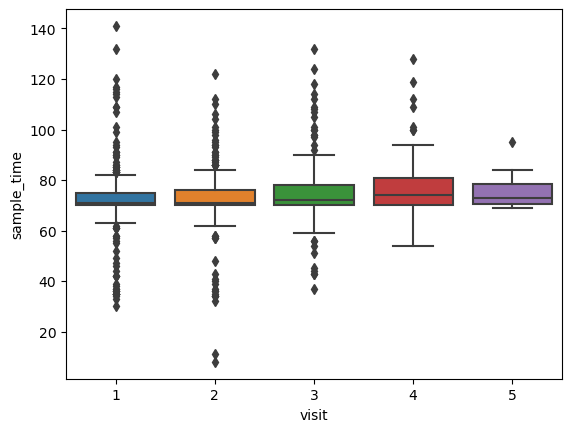

In [32]:
figure=sns.boxplot(correction.dropna(),x="visit",y="sample_time")
fig=figure.get_figure()
fig.savefig("Distribution_samplingtime_visit_nox.png",bbox_inches="tight")

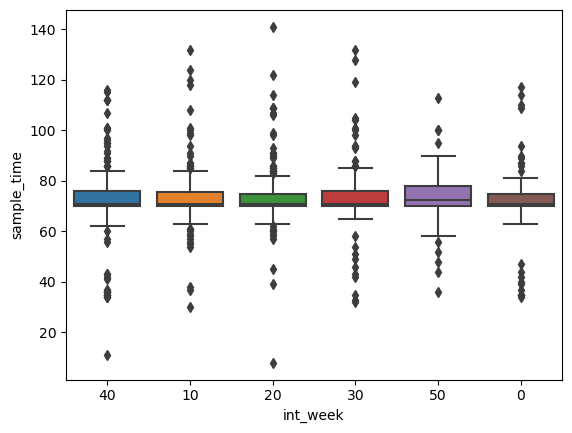

In [34]:
figure=sns.boxplot(correction.dropna(),x="int_week",y="sample_time")
fig=figure.get_figure()
fig.savefig("Distribution_samplingtime_season_nox.png",bbox_inches="tight")

In [28]:
def exp(x, a, b):
    return a * np.exp(b * x)
def linear(x, a, b):
    return a * x +b
def log(x, a, b):
    return a*b**x +b

In [30]:
X_train, X_test, y_train, y_test = train_test_split(correction, correction.Nox, test_size = 0.3)

In [32]:
exp_curve=curve_fit(lambda t,a,b: a*np.exp(b*t),  X_train.sample_time,y_train)
linear_curve=curve_fit(lambda t,a,b: a * t +b,  X_train.sample_time,y_train)
log_curve=curve_fit(lambda t,a,b: a*b**t +b,  X_train.sample_time,y_train)

In [35]:
rmse_exp=np.sqrt(np.mean((exp(X_test.sample_time,*exp_curve[0])-y_test)**2))
rmse_linear=np.sqrt(np.mean((linear(X_test.sample_time,*linear_curve[0])-y_test)**2))
rmse_log=np.sqrt(np.mean((linear(X_test.sample_time,*log_curve[0])-y_test)**2))
rmse_exp,rmse_linear,rmse_log

(23.445566919324843, 23.449411045543478, 274.6548760122209)

In [39]:
r2_exp=r2_score(y_test,exp(X_test.sample_time,*exp_curve[0]))
r2_linear=r2_score(y_test,linear(X_test.sample_time,*linear_curve[0]))
r2_log=r2_score(y_test,log(X_test.sample_time,*log_curve[0]))
r2_exp,r2_linear,r2_log

(-0.0011818736361233206, -0.001510207347694692, -0.0011840861446739126)

In [41]:
chem["Nox_corrected_exp"]=exp(10,*exp_curve[0])/exp(chem.sample_time,*exp_curve[0])*chem.Nox
chem["Nox_corrected_linear"]=linear(10,*linear_curve[0])/linear(chem.sample_time,*linear_curve[0])*chem.Nox
chem["Nox_corrected_log"]=log(10,*log_curve[0])/log(chem.sample_time,*log_curve[0])*chem.Nox

In [57]:
chem["Nox_scale_exp"]=exp(10,*exp_curve[0])/exp(chem.sample_time,*exp_curve[0])
chem["Nox_scale_linear"]=linear(10,*linear_curve[0])/linear(chem.sample_time,*linear_curve[0])
chem["Nox_scale_log"]=log(10,*log_curve[0])/log(chem.sample_time,*log_curve[0])

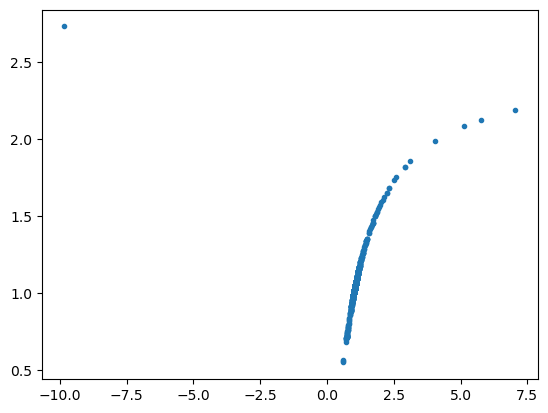

In [65]:
plt.plot(chem.Nox_scale_linear,chem.Nox_scale_exp,'.')

[]

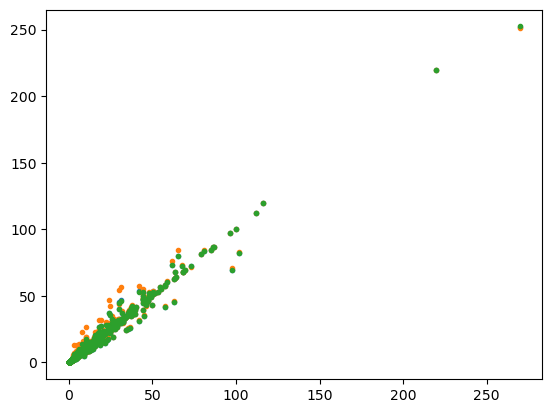

In [53]:
plt.plot(chem.Nox,chem.Nox_corrected_exp,'.')
plt.plot(chem.Nox,chem.Nox_corrected_linear,'.')
plt.plot(chem.Nox,chem.Nox_corrected_log,'.')
plt.plot()

In [66]:
chem.sample_time

0        9.000000
1        9.428571
2       11.714286
3       15.428571
4       11.000000
          ...    
1006    10.714286
1007    12.285714
1008    11.285714
1009    10.000000
1010     9.285714
Name: sample_time, Length: 1011, dtype: float64